# Noise Analyse <br>
Die Analyse von Maschinengeräuschen dient unter anderem dem frühzeitigen Erkennen von Verschleiserscheinungen sowie der Detektion falscher Betriebspukte und damit einhergehenden Ressonanzschäden. 

### Importieren der benötigten Python-Pakete <br>
Die hier verwendeten Funktionspakete sind bereits bekannt:


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd

**Laden und Vorstellung der Audiofiles** <br>
Zunächst wird die .wav - Datei des Pumpengeräuschs in Jupyter Notebook eingelesen

In [9]:
import os
if os.name == 'nt':
    print ("OS Type is: ", os.name)
    local_path=!@echo %cd%
    !dir /B
if os.name == 'posix':
    print (os.name)
    local_path=!pwd
    print ("current Path:", local_path)
    !ls -a
    
print ("Type of local_path: ", type (local_path))
local_path= str(local_path)
print ("Type of local_path now: ", type (local_path))
print ("current Path:", local_path)
local_path=local_path[2:-2]
print ("current Path formatiert:", local_path)

BASE_FOLDER=os.getcwd()
print("BASE_FOLDER = ", BASE_FOLDER)
os.listdir()

OS Type is:  nt
.ipynb_checkpoints
Noise Analyse with FFT (mit librosa).ipynb
Noise Analysis with FFT (mit scipy).ipynb
Noise Analysis with FFT (Spyder Code).py
Pumpe.wav
Type of local_path:  <class 'IPython.utils.text.SList'>
Type of local_path now:  <class 'str'>
current Path: ['C:\\Users\\ThomasRueter\\Desktop\\Vorlesung 21.6.22\\3. Jupyter Notebook Codes\\3. noise analysing']
current Path formatiert: C:\\Users\\ThomasRueter\\Desktop\\Vorlesung 21.6.22\\3. Jupyter Notebook Codes\\3. noise analysing
BASE_FOLDER =  C:\Users\ThomasRueter\Desktop\Vorlesung 21.6.22\3. Jupyter Notebook Codes\3. noise analysing


['.ipynb_checkpoints',
 'Noise Analyse with FFT (mit librosa).ipynb',
 'Noise Analysis with FFT (mit scipy).ipynb',
 'Noise Analysis with FFT (Spyder Code).py',
 'Pumpe.wav']

In [10]:
pumpe_sound_file = "Pumpe.wav"
pumpe, sr = librosa.load(os.path.join(BASE_FOLDER, pumpe_sound_file))
sampling_rate = sr

Hören wir uns das Soundfile an:

In [87]:
ipd.Audio(os.path.join(BASE_FOLDER, pumpe_sound_file)) 

Nun können wir das Geräusch noch grafisch darstellen:

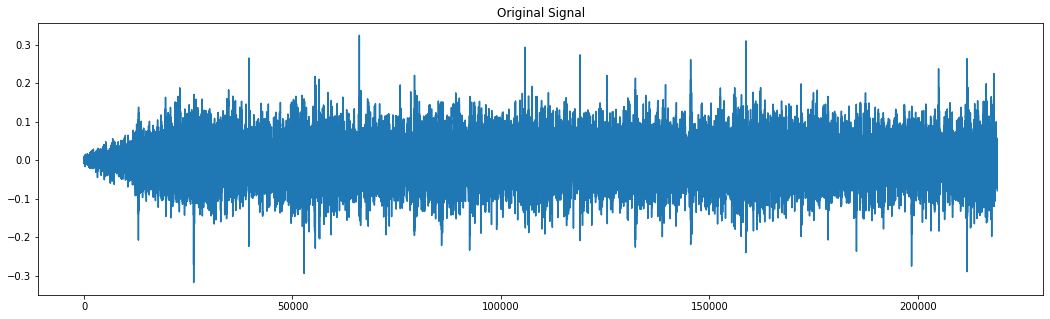

In [11]:
plt.figure(figsize=(18, 5))
plt.title("Original Signal")
plt.plot(pumpe)
plt.show()

### Transformation in den Frequenzbereich <br>
Nun können wir beginnen das Geräusch zu untersuchen. Hierfür transformieren wir es zunächst mittels der fft Funktion in den Frequenzbereich:

In [12]:
fft_komplex_pumpe = np.fft.fft(pumpe)

Wie bereits in der Musikanalyse gezeigt, müssen nach der Foriertransformation die Imaginärteile eliminiert werden.

In [13]:
fft_real_pumpe = np.abs(fft_komplex_pumpe)

Sehen wir uns die gefundenen Frequenzen an:

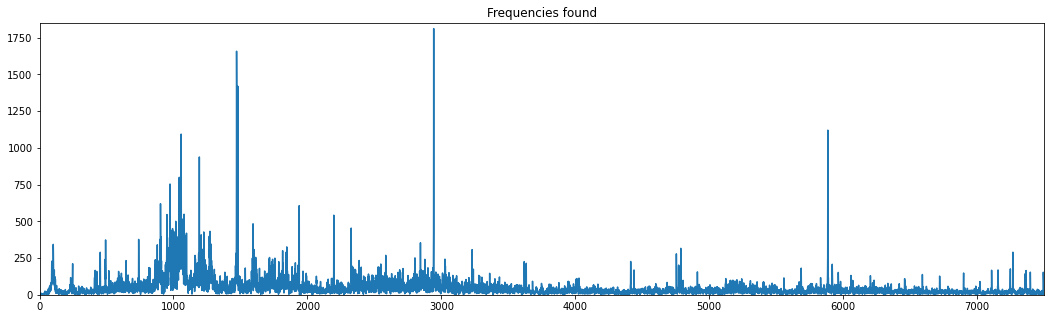

In [14]:
plt.figure(figsize=(18, 5))
plt.plot(fft_real_pumpe)
plt.title("Frequencies found")
plt.axis([0,7500, 0, 1850])
plt.show()

Wie wir sehen weißt das Geräusch im höheren Frequenzbereich zwei signifikante Frequenzanteile auf. <br>
Schauen wir uns diese Bereiche näher an, indem wir die Skalierung der x-Achse anpassen

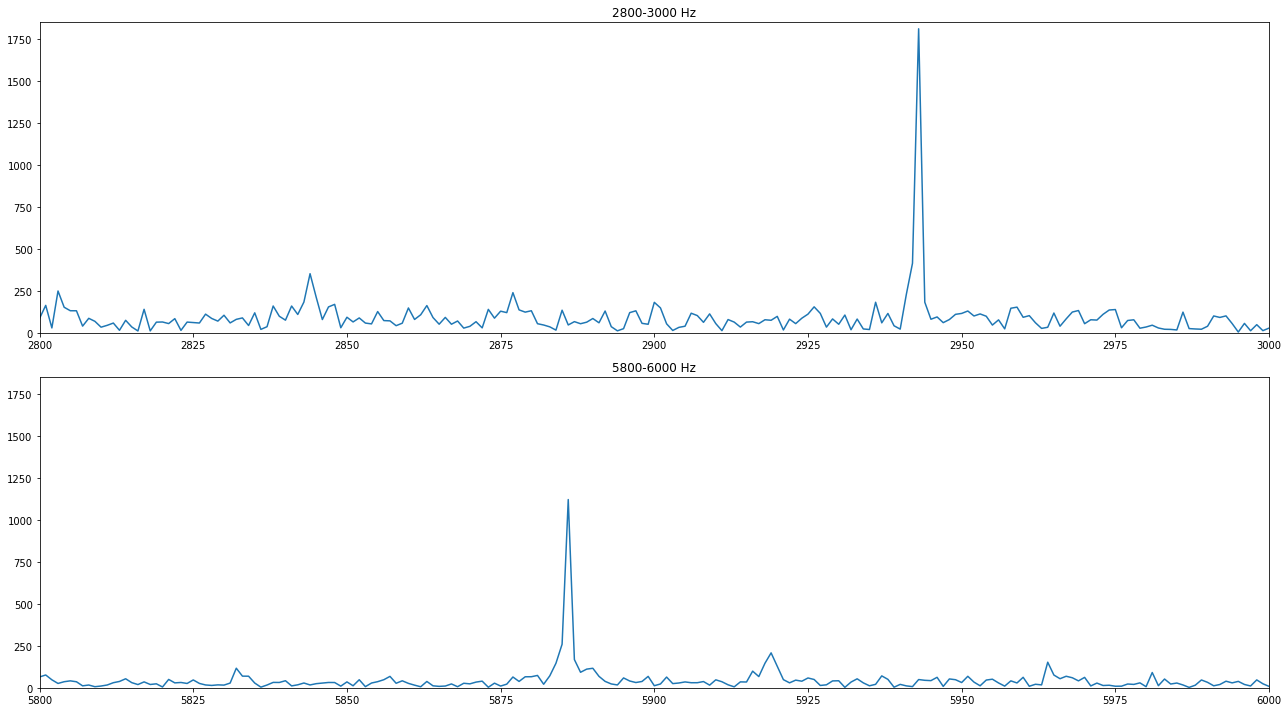

In [15]:
plt.figure(figsize=(18, 10))
plt.subplot(2,1,1)
plt.plot(fft_real_pumpe)
plt.axis([2800,3000, 0, 1850])
plt.title("2800-3000 Hz")

plt.subplot(2,1,2)
plt.plot(fft_real_pumpe)
plt.title("5800-6000 Hz")
plt.axis([5800,6000, 0, 1850])

plt.tight_layout()
plt.show()

### Suchen nach Ressonanzen <br>
Nun durchsuchen wir den Frequenzbereich nach möglichen Ressonanzen: <br>
Dafür suchen wir zunächst die am stärksten enthaltene Frequenz des Signals:

In [16]:
max_freq_value = np.argmax(fft_real_pumpe)
print(max_freq_value)

2943


In [17]:
ressonance_list = [0.3*max_freq_value, 0.5*max_freq_value, 2*max_freq_value, 4*max_freq_value]
print(ressonance_list)

[882.9, 1471.5, 5886, 11772]


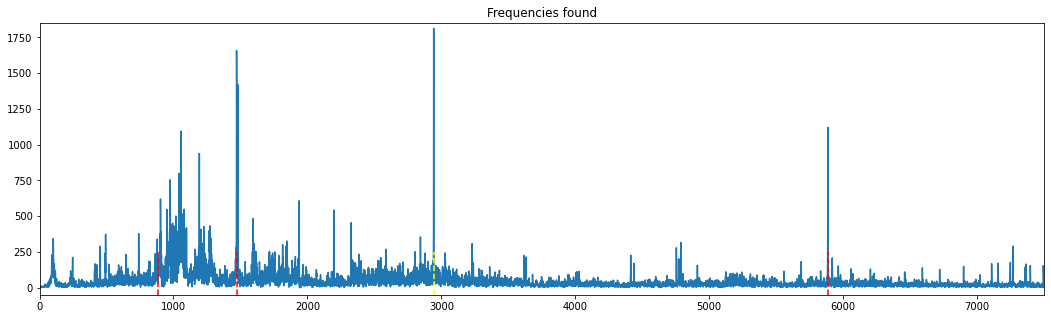

In [18]:
plt.figure(figsize=(18, 5))
plt.plot(fft_real_pumpe)
plt.title("Frequencies found")
plt.axis([0,7500, -50, 1850])

plt.vlines([max_freq_value], -50, 250, linestyles='dashed', colors='yellow')
plt.vlines([ressonance_list], -50, 250, linestyles='dashed', colors='red')

plt.show()

Wie kann man die Eigenfrequenzen sinvoll verschienben? ...

### Filtern von Störfrequenzen <br>
Nun möchten wir diese Frequenzbereiche isoliert betrachten. Dafür benötigen wir einen Filter, welcher die nicht berücksichtigten Frequenzen des Signals eliminiert bzw. mit 0 überschreibt. <br>
Zunächst definieren wir die Werte, zwischen welchen das Signal erhalten bleiben soll:

In [19]:
# Unter- und Obergrenze 1
Filter1 = [2800, 3000]
# Unter- und Obergrenze 2
Filter2 = [5800, 6000]

Nun benötigen wir eine Funktion, welche eine neue Liste erstellt in welcher die unerwünschten Frequenzanteile des Signals *(fft_real_pumpe)*  mit 0 überschrieben werden.

In [20]:
filtered_freq_step1 = [f if (Filter1[0] < index < Filter2[1] and f > 1) else 0 for index, f in enumerate(fft_real_pumpe)]
filtered_freq_complete = [0 if (Filter1[1] < index < Filter2[0]) else f for index, f in enumerate(filtered_freq_step1)]

Nun können wir uns das gefilterte Signal grafisch anschauen:

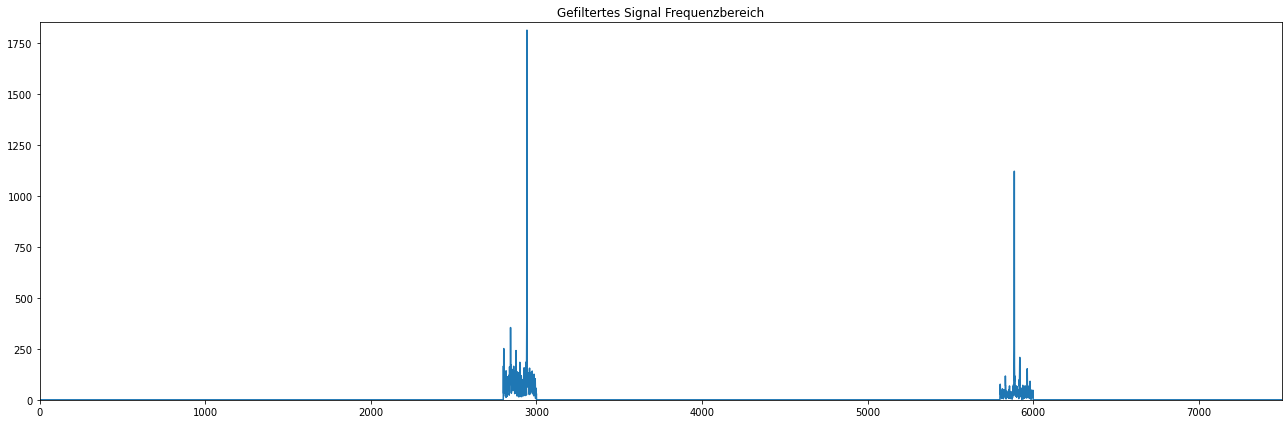

In [21]:
plt.figure(figsize=(18, 6))
plt.plot(filtered_freq_complete)
plt.title("Gefiltertes Signal Frequenzbereich")
plt.axis([0,7500, 0, 1850])
plt.tight_layout()
plt.show()

### Rücktransformation in den Zeitbereich <br>
Nun wird das gefliterte Signal mittels der inversen Fouriertransformation zurück in den Zeitbereich transformiert und daraus eine .wav Datei erstellt:

In [22]:
filtered_signal_time = np.fft.ifft(filtered_freq_complete)

C:\Users\ThomasRueter\Miniconda3\envs\tf\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


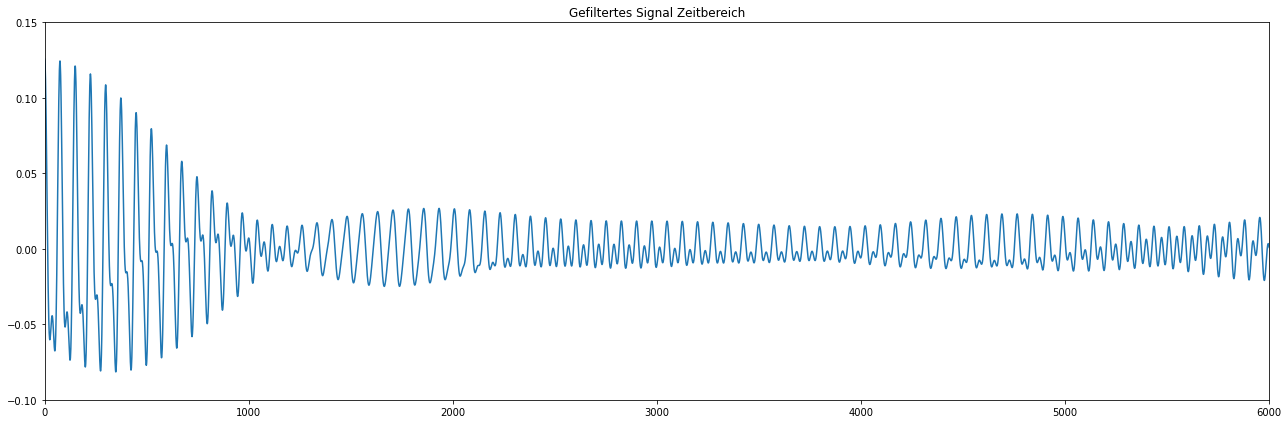

In [23]:
plt.figure(figsize=(18, 6))
plt.plot(filtered_signal_time)
plt.title("Gefiltertes Signal Zeitbereich")
plt.axis([0,6000, -0.1, 0.15])
plt.tight_layout()
plt.show()

In [24]:
xf_max = len(filtered_signal_time)

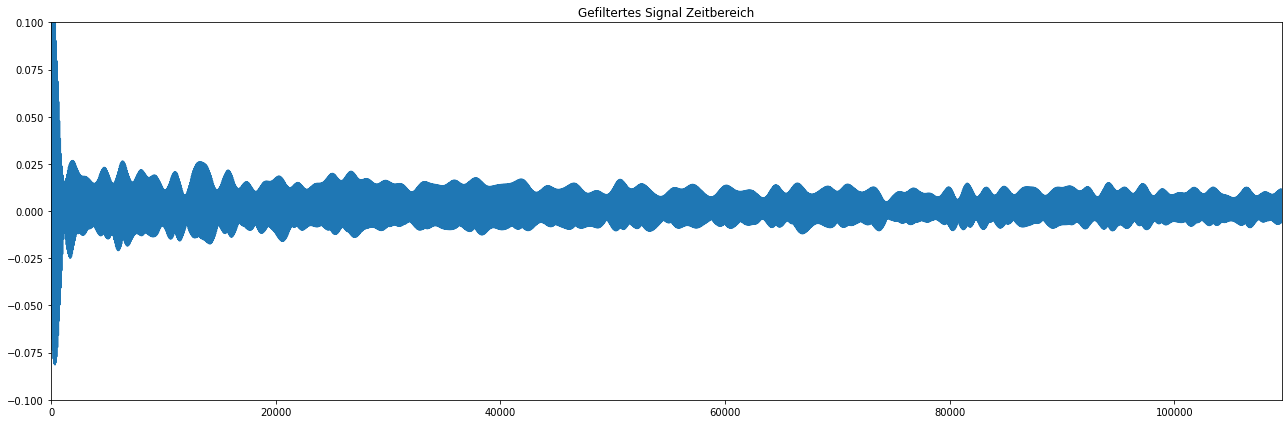

In [25]:
plt.figure(figsize=(18, 6))
plt.plot(filtered_signal_time)
plt.title("Gefiltertes Signal Zeitbereich")
plt.axis([0, xf_max/2, -0.1, 0.1])
plt.tight_layout()
plt.show()

In [28]:
# .wav datei aus gefiltertem Signal schreiben
import wave
import struct

In [29]:
amplitude = 16000
nframes = xf_max
sampling_rate = sr
comptype = "NONE"
compname = "not compressed"
nchannels = 1
sampwidth = 2

In [30]:
wav_file=wave.open('filtersignal.wav', 'w')
wav_file.setparams((nchannels, sampwidth, int(sampling_rate), nframes, comptype, compname))

In [31]:
for s in filtered_signal_time:
    wav_file.writeframes(struct.pack('h', int(s*amplitude)))

C:\Users\ThomasRueter\AppData\Local\Temp\ipykernel_13636\530253183.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  wav_file.writeframes(struct.pack('h', int(s*amplitude)))


In [32]:
filter_sound_file = "filtersignal.wav"
filter, sr = librosa.load(os.path.join(BASE_FOLDER, filter_sound_file))

In [33]:
ipd.Audio(os.path.join(BASE_FOLDER, filter_sound_file)) 